# What is Expected Goals?

Expected Goals (commonly referred to as 'xG'), is essentially the probability (% chance) of a shot converting into a goal. So, if the xG of a shot is 0.62, that means that shot has a 62% probability/chance of converting into a goal.

## How is xG used in Football Analysis?

In the words of **James Tippet**, xG can not only be used to predict the winner of a football () match, but also which player might score or assist a goal.

1. Scouting players.
1. Performance of teams in a match/in multiple matches.
1. Player and Team performance analysis for the entire (or ongoing) season.
1. Setting the odds for betting and also actually betting.

# What is Machine Learning?

According to [IBM](https://www.ibm.com/cloud/learn/machine-learning), Machine Learning (ML) is a branch of artificial intelligence (AI) and computer science (CS) which focuses on the use of data and algorithms to imitate the way that humans learn, gradually improving its accuracy.

**THE ML PROCESS**\
\
Decision Process ---> Error Checking ---> Model Optimization

# Classification Models

According to the [Serokell Blog](https://serokell.io/blog/classification-algorithms),
we predict whether a thing can be referred to a particular class every day. To give an example, classification helps us make decisions when picking tomatoes in a supermarket (“green”, “perfect”, “rotten”). In machine learning terms, we assign a label of one of the classes to every tomato we hold in our hands.

The efficiency of your Tomato Picking Contest (some would call it a classification model) depends on the accuracy of its results. The more often you go to the supermarket yourself (instead of sending your parents or your significant other), the better you will become at picking out tomatoes that are fresh and yummy.

Computers are just the same! For a classification model to learn to predict outcomes accurately, it needs a lot of training examples.

## Binary Classification Model

Again, according to the [Serokell Blog](https://serokell.io/blog/classification-algorithms), Binary classification means there are two classes to work with that relate to one another as true and false. Imagine you have a huge lug box in front of you with yellow and red tomatoes. But, your fancy Italian pasta recipe says that you only need the red ones.

What do you do? Obviously, you use label-encoding and, in this case, assign 1 to “red” and 0 to “not red”. Sorting tomatoes has never been easier.

# Import Required Libraries

In [2]:
# Data Manipulation libraries:
import json
import numpy as np
import pandas as pd
from copy import deepcopy

# Load the Data

Data Courtesy: [Luca Pappalardo et.al.](https://figshare.com/collections/Soccer_match_event_dataset/4415000/2)\
[Related research paper](https://www.nature.com/articles/s41597-019-0247-7)

In [ ]:
json.load(open("../data/events_England.json"))

In [ ]:
engEvents = pd.json_normalize(json.load(open("../data/events_England.json")))

In [ ]:
engEvents

In [ ]:
engShotData = deepcopy(engEvents[engEvents["eventId"] == 10])

In [ ]:
engShotData.shape

In [ ]:
engShotData.iloc[0]

In [ ]:
engShotData.iloc[0]["tags"]

[Wyscout Glossary](https://dataglossary.wyscout.com/)

In [ ]:
engEvents[["eventId", "eventName"]].drop_duplicates()

## Get X & Y coordinates for start and end locations

In [ ]:
engShotData["positions"]

In [ ]:
pd.DataFrame(engShotData["positions"].tolist(), index=engShotData.index)

In [ ]:
engShotData[["startYX", "endYX"]] =\
    pd.DataFrame(engShotData["positions"].tolist(), index=engShotData.index)

In [ ]:
pd.DataFrame(engShotData["startYX"].tolist(), index=engShotData.index)

In [ ]:
pd.DataFrame(engShotData["endYX"].tolist(), index=engShotData.index)

In [ ]:
engShotData[["startY", "startX"]] = pd.DataFrame(engShotData["startYX"].tolist(), index=engShotData.index)

In [ ]:
engShotData[["endY", "endX"]] = pd.DataFrame(engShotData["endYX"].tolist(), index=engShotData.index)

In [ ]:
engShotData.head()

## Shot Map

In [ ]:
import mplsoccer

In [ ]:
pitch = mplsoccer.VerticalPitch(pitch_type="wyscout",
                                half=True)
fig, ax = pitch.draw()
pitch.scatter(engShotData["startX"],pi
              engShotData["startY"],
              ax=ax, s=4)

In [ ]:
pitch = mplsoccer.VerticalPitch(pitch_type="wyscout",
                        pitch_color="#101010",
                        line_color="#ffffff",
                        half=True,
                        pad_bottom=20,
                                line_zorder=2)
fig, ax = pitch.draw()
pitch.hexbin(engShotData["startX"],
             engShotData["startY"],
             gridsize=(15, 15), ax=ax,
             cmap="coolwarm")

## Load Data for all 5 leagues

In [3]:
leagueList = ["England", "Spain", "Italy", "Germany", "France"]

In [4]:
finalShotData = pd.DataFrame()

for leagueName in leagueList:
    eventsData = pd.json_normalize(json.load(open("../data/events_" + leagueName + ".json")))
    eventsShotData = deepcopy(eventsData[eventsData["eventId"] == 10])
    
    finalShotData = finalShotData.append(eventsShotData)    

In [5]:
finalShotData.shape

(40461, 12)

In [6]:
finalShotData.reset_index(drop=True, inplace=True)

## Get X & Y coordinates for start and end locations

In [7]:
pd.DataFrame(finalShotData["positions"].tolist(), index=finalShotData.index)

,0,1
0,"{'y': 41, 'x': 88}","{'y': 0, 'x': 0}"
1,"{'y': 52, 'x': 85}","{'y': 100, 'x': 100}"
2,"{'y': 52, 'x': 96}","{'y': 100, 'x': 100}"
3,"{'y': 33, 'x': 81}","{'y': 0, 'x': 0}"
4,"{'y': 30, 'x': 75}","{'y': 0, 'x': 0}"
...,...,...
40456,"{'y': 26, 'x': 87}","{'y': 0, 'x': 0}"
40457,"{'y': 50, 'x': 89}","{'y': 0, 'x': 0}"
40458,"{'y': 59, 'x': 91}","{'y': 100, 'x': 100}"
40459,"{'y': 50, 'x': 95}","{'y': 100, 'x': 100}"


In [8]:
finalShotData[["startYX", "endYX"]] =\
    pd.DataFrame(finalShotData["positions"].tolist(), index=finalShotData.index)

In [11]:
pd.DataFrame(finalShotData["startYX"].tolist(), index=finalShotData.index)

,y,x
0,41,88
1,52,85
2,52,96
3,33,81
4,30,75
...,...,...
40456,26,87
40457,50,89
40458,59,91
40459,50,95


In [12]:
pd.DataFrame(finalShotData["endYX"].tolist(), index=finalShotData.index)

,y,x
0,0,0
1,100,100
2,100,100
3,0,0
4,0,0
...,...,...
40456,0,0
40457,0,0
40458,100,100
40459,100,100


In [13]:
finalShotData[["startY", "startX"]] = pd.DataFrame(finalShotData["startYX"].tolist(), index=finalShotData.index)

In [14]:
finalShotData[["endY", "endX"]] = pd.DataFrame(finalShotData["endYX"].tolist(), index=finalShotData.index)

## Get `goal` column

In [15]:
pd.DataFrame(finalShotData["tags"].tolist(), index=finalShotData.index)

,0,1,2,3,4,5
0,{'id': 101},{'id': 402},{'id': 201},{'id': 1205},{'id': 1801},None
1,{'id': 401},{'id': 201},{'id': 1211},{'id': 1802},None,None
2,{'id': 101},{'id': 403},{'id': 201},{'id': 1207},{'id': 1801},None
3,{'id': 401},{'id': 201},{'id': 1215},{'id': 1802},None,None
4,{'id': 402},{'id': 201},{'id': 1205},{'id': 1801},None,None
...,...,...,...,...,...,...
40456,{'id': 401},{'id': 201},{'id': 1205},{'id': 1801},None,None
40457,{'id': 402},{'id': 201},{'id': 1214},{'id': 1802},None,None
40458,{'id': 401},{'id': 2101},{'id': 201},{'id': 1802},None,None
40459,{'id': 401},{'id': 201},{'id': 1201},{'id': 1801},None,None


In [16]:
tagsData = pd.DataFrame(finalShotData["tags"].tolist(), index=finalShotData.index)

In [17]:
tagsData

,0,1,2,3,4,5
0,{'id': 101},{'id': 402},{'id': 201},{'id': 1205},{'id': 1801},None
1,{'id': 401},{'id': 201},{'id': 1211},{'id': 1802},None,None
2,{'id': 101},{'id': 403},{'id': 201},{'id': 1207},{'id': 1801},None
3,{'id': 401},{'id': 201},{'id': 1215},{'id': 1802},None,None
4,{'id': 402},{'id': 201},{'id': 1205},{'id': 1801},None,None
...,...,...,...,...,...,...
40456,{'id': 401},{'id': 201},{'id': 1205},{'id': 1801},None,None
40457,{'id': 402},{'id': 201},{'id': 1214},{'id': 1802},None,None
40458,{'id': 401},{'id': 2101},{'id': 201},{'id': 1802},None,None
40459,{'id': 401},{'id': 201},{'id': 1201},{'id': 1801},None,None


In [18]:
tagsData[0].apply(lambda x: x["id"])

0        101
1        401
2        101
3        401
4        402
        ... 
40456    401
40457    402
40458    401
40459    401
40460    101
Name: 0, Length: 40461, dtype: int64

In [21]:
tagsData[0].apply(lambda x: x["id"] if (x != None) else 0)

0        101
1        401
2        101
3        401
4        402
        ... 
40456    401
40457    402
40458    401
40459    401
40460    101
Name: 0, Length: 40461, dtype: int64

In [22]:
for col in tagsData.columns:
    print(101 in tagsData[col].apply(lambda x: x["id"] if (x != None) else 0).unique())

True
False
False
False
False
False


In [23]:
tagsData[0].apply(lambda x: x["id"] if (x != None) else 0) == 101

0         True
1        False
2         True
3        False
4        False
         ...  
40456    False
40457    False
40458    False
40459    False
40460     True
Name: 0, Length: 40461, dtype: bool

In [24]:
goalCond = tagsData[0].apply(lambda x: x["id"] if (x != None) else 0) == 101

In [25]:
finalShotData["goal"] = np.where(goalCond, 1, 0)

In [ ]:
finalShotDatatData.to_csv("../data/shotDataForxG.csv", index=False)

# xG Models

## Distance Model

### Calculation of Distance

In [27]:
[100]*5

[100, 100, 100, 100, 100]

In [28]:
x1 = finalShotData["startX"]
x2 = pd.Series([100]*len(finalShotData))
y1 = finalShotData["startY"]
y2 = pd.Series([50]*len(finalShotData))

In [29]:
np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

0        15.000000
1        15.132746
2         4.472136
3        25.495098
4        32.015621
           ...    
40456    27.294688
40457    11.000000
40458    12.727922
40459     5.000000
40460    19.849433
Length: 40461, dtype: float64

In [30]:
finalShotData["shotDist"] = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

### Decision-Making

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#### Separate out Train and Test Data

In [114]:
xTrain, xTest, yTrain, yTest = train_test_split(finalShotData["shotDist"], finalShotData["goal"])

In [115]:
finalShotData.shape

(40461, 21)

In [116]:
xTest.shape

(10116,)

In [117]:
yTest.shape

(10116,)

#### The Classification Algorithm

In [118]:
lrModel = LogisticRegression()

In [119]:
lrModel

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

y = f(x)

In [120]:
# Training step:
lrModel.fit(X=np.array(xTrain).reshape(-1, 1), y=yTrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [121]:
lrModel.intercept_

array([0.15271736])

In [122]:
lrModel.predict(np.array(xTest).reshape(-1, 1))

array([0, 0, 0, ..., 0, 0, 0])

In [123]:
lrModel.predict_proba(np.array(xTest).reshape(-1, 1))[:, 1]

array([0.03797148, 0.08122624, 0.029274  , ..., 0.02948747, 0.08122624,
       0.04803912])

In [124]:
predProbs = lrModel.predict_proba(np.array(xTest).reshape(-1, 1))[:, 1]

In [125]:
predictions = lrModel.predict(np.array(xTest).reshape(-1, 1))

In [126]:
finalShotData["goal"].unique()

array([1, 0])

In [127]:
np.unique(predictions)

array([0, 1])

In [128]:
predProbs.max()

0.5044377624262281

### Error-Checking

In [129]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, log_loss

In [130]:
yActual = yTest

In [131]:
print("Accuracy: ", round(accuracy_score(yActual, predictions), 4)*100, "%")
print("Brier RMSE: ", round(mean_squared_error(yActual, predictions), 2))
print("Log Loss: ", round(log_loss(yActual, predictions), 2))
cf_mat = confusion_matrix(yActual, predictions)
print(cf_mat)

Accuracy:  89.84 %
Brier RMSE:  0.1
Log Loss:  3.51
[[9087    0]
 [1028    1]]


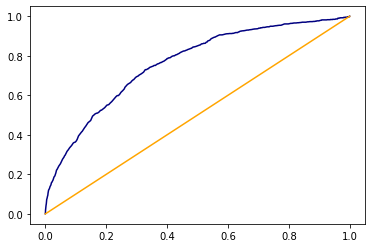

In [132]:
fpr_roc, tpr_roc, _ = roc_curve(yTest, predProbs)
plt.plot(fpr_roc, tpr_roc, color="navy")
plt.plot([0, 1], [0, 1], color="orange")

NOTE:\
\
[RMSE Explanation](https://www.statisticshowto.com/probability-and-statistics/regression-analysis/rmse-root-mean-square-error/)

[Log Loss Explanation - 1](https://www.kaggle.com/dansbecker/what-is-log-loss)

[Log Loss Explanation - 2](https://www.analyticsvidhya.com/blog/2020/11/binary-cross-entropy-aka-log-loss-the-cost-function-used-in-logistic-regression/)

## Using Angle to the Goal

### Calculation of Angle

In [65]:
import mplsoccer

(<Figure size 1008x720 with 1 Axes>, <AxesSubplot:>)

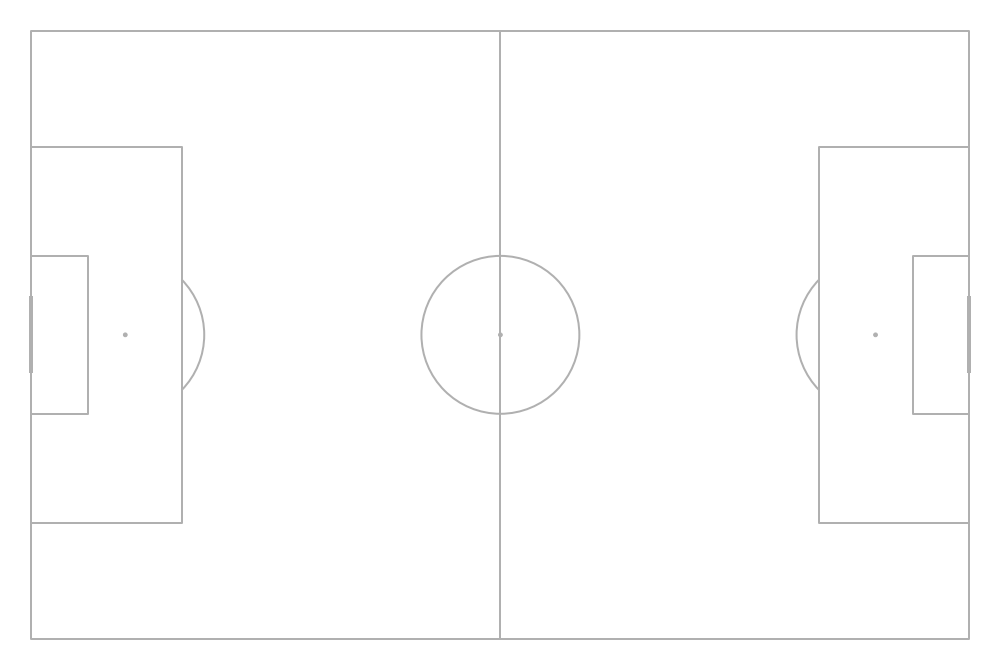

In [67]:
pitch = mplsoccer.Pitch(pitch_type="wyscout")
pitch.draw(figsize=(14, 10))

In [68]:
x2 = pd.Series([100]*len(finalShotData))
y2 = pd.Series([46]*len(finalShotData))
x3 = pd.Series([100]*len(finalShotData))
y3 = pd.Series([54]*len(finalShotData))

In [71]:
def calcDistance(a1, b1, a2, b2):
    return np.sqrt((a2 - a1) ** 2 + (b2 - b1) ** 2)

In [72]:
a = calcDistance(x1, y1, x2, y2)
b = calcDistance(x1, y1, x3, y3)
c = calcDistance(x2, y2, x3, y3)

In [73]:
np.arccos((a ** 2 + b ** 2 - c ** 2) / (2 * a * b))

0        0.430586
1        0.513058
2        1.446441
3        0.235306
4        0.195680
           ...   
40456    0.141705
40457    0.697542
40458    0.458153
40459    1.349482
40460    0.268489
Length: 40461, dtype: float64

In [75]:
(np.arccos((a ** 2 + b ** 2 - c ** 2) / (2 * a * b)) * 180) / np.pi

0        24.670745
1        29.396053
2        82.874984
3        13.482061
4        11.211618
           ...    
40456     8.119099
40457    39.966213
40458    26.250242
40459    77.319617
40460    15.383297
Length: 40461, dtype: float64

In [76]:
finalShotData["shotAngle"] = (np.arccos((a ** 2 + b ** 2 - c ** 2) / (2 * a * b)) * 180) / np.pi

[How to calculate angle from distance?](https://www.mathsisfun.com/algebra/trig-cosine-law.html)

### Decision-making

#### Separate out Train and Test Data

In [133]:
xTrain, xTest, yTrain, yTest = train_test_split(finalShotData["shotAngle"], finalShotData["goal"])

#### The Classification Algorithm

In [134]:
lrModel = LogisticRegression()

In [135]:
lrModel

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [136]:
# Training step
lrModel.fit(X=np.array(xTrain).reshape(-1, 1), y=yTrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [137]:
# Testing step
lrModel.predict(np.array(xTest).reshape(-1, 1))

array([0, 0, 0, ..., 0, 0, 0])

In [138]:
lrModel.predict_proba(np.array(xTest).reshape(-1, 1))[:, 1]

array([0.05824854, 0.13853828, 0.03774436, ..., 0.06393485, 0.05612816,
       0.13997352])

In [139]:
predProbs = lrModel.predict_proba(np.array(xTest).reshape(-1, 1))[:, 1]

In [140]:
predictions = lrModel.predict(np.array(xTest).reshape(-1, 1))

In [141]:
finalShotData["goal"].unique()

array([1, 0])

In [142]:
np.unique(predictions)

array([0, 1])

### Error-Checking

In [143]:
print("Accuracy: ", round(accuracy_score(yTest, predictions), 4)*100, "%")
print("Brier RMSE: ", round(mean_squared_error(yTest, predictions), 2))
print("Log Loss: ", round(log_loss(yTest, predictions), 2))
cf_mat = confusion_matrix(yTest, predictions)
print(cf_mat)

Accuracy:  89.59 %
Brier RMSE:  0.1
Log Loss:  3.6
[[8975   54]
 [ 999   88]]


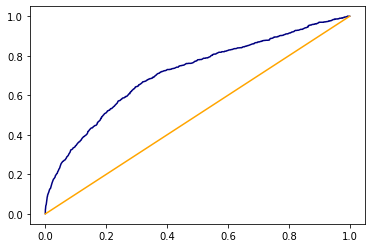

In [144]:
fpr_roc, tpr_roc, _ = roc_curve(yTest, predProbs)
plt.plot(fpr_roc, tpr_roc, color="navy")
plt.plot([0, 1], [0, 1], color="orange")

# Final xG Model

### Decision-making

#### Separate out Train and Test Data

In [97]:
xCols = ["shotDist", "shotAngle"]
yCol = "goal"

In [98]:
xTrain, xTest, yTrain, yTest = train_test_split(finalShotData[xCols], finalShotData[yCol])

#### The Classification Algorithm

In [99]:
lrModel = LogisticRegression()

In [101]:
# Training step:
lrModel.fit(X=xTrain, y=yTrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [102]:
lrModel.predict(xTest)

array([0, 0, 0, ..., 0, 0, 0])

In [103]:
lrModel.predict_proba(xTest)[:, 1]

array([0.0857264 , 0.13251125, 0.07386611, ..., 0.05790533, 0.11644503,
       0.09341997])

In [104]:
predProbs = lrModel.predict_proba(xTest)[:, 1]

In [105]:
predictions = lrModel.predict(xTest)

In [107]:
type(yTest)

pandas.core.series.Series

In [106]:
yTest.unique()

array([0, 1])

In [108]:
type(predictions)

numpy.ndarray

In [109]:
predictions.unique()

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

In [110]:
np.unique(predictions)

array([0, 1])

### Error-Checking

In [111]:
print("Accuracy: ", round(accuracy_score(yTest, predictions), 4)*100, "%")
print("Brier RMSE: ", round(mean_squared_error(yTest, predictions), 2))
print("Log Loss: ", round(log_loss(yTest, predictions), 2))
cf_mat = confusion_matrix(yTest, predictions)
print(cf_mat)

Accuracy:  90.0 %
Brier RMSE:  0.1
Log Loss:  3.46
[[9064   16]
 [ 996   40]]


In [112]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

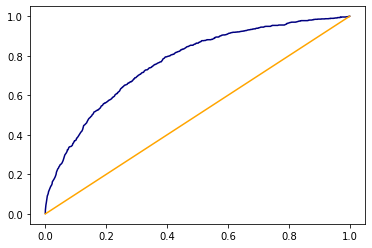

In [113]:
fpr_roc, tpr_roc, _ = roc_curve(yTest, predProbs)
plt.plot(fpr_roc, tpr_roc, color="navy")
plt.plot([0, 1], [0, 1], color="orange")